<a href="https://colab.research.google.com/github/amelliaaas/PraktikumML_282-305/blob/main/ANN_kelas_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install imutils

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Covid19-dataset

/content/drive/MyDrive/Covid19-dataset


In [4]:
import os

base_dir ='/content/drive/MyDrive/Covid19-dataset'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

train_covid_dir = os.path.join(train_dir, 'Covid')
train_normal_dir = os.path.join(train_dir, 'Normal')
train_viral_pneumonia_dir = os.path.join(train_dir, 'Viral Pneumonia')

test_covid_dir = os.path.join(test_dir, 'Covid')
test_normal_dir = os.path.join(test_dir, 'Normal')
test_viral_pneumonia_dir = os.path.join(test_dir, 'Viral Pneumonia')

In [5]:
# Cek penamaan image yang ada di folder train_cats_dir dan train_dogs_dir
print(os.listdir(train_covid_dir)[:10])
print(os.listdir(train_normal_dir)[:10])
print(os.listdir(train_viral_pneumonia_dir)[:10])

['012.jpeg', '019.png', '010.png', '02.jpeg', '01.jpeg', '015.jpg', '032.jpeg', '03.jpeg', '042.jpeg', '031.jpeg']
['010.jpeg', '012.jpeg', '017.jpeg', '01.jpeg', '018.jpeg', '016.jpeg', '014.jpeg', '015.jpeg', '019.jpeg', '011.jpeg']
['018.jpeg', '041.jpeg', '020.jpeg', '011.jpeg', '048.jpeg', '045.jpeg', '037.jpeg', '019.jpeg', '025.jpeg', '042.jpeg']


In [6]:
# Cek jumlah data train dan data validation
#2. Menampilkan hasil jumlah pembagian
import os
import shutil

testcovid = "/content/drive/MyDrive/Covid19-dataset/test/Covid"
testnormal = "/content/drive/MyDrive/Covid19-dataset/test/Normal"
testviralpneumonia = "/content/drive/MyDrive/Covid19-dataset/test/Viral Pneumonia"
traincovid = "/content/drive/MyDrive/Covid19-dataset/train/Covid"
trainnormal = "/content/drive/MyDrive/Covid19-dataset/train/Normal"
trainviralpneumonia = "/content/drive/MyDrive/Covid19-dataset/train/Viral Pneumonia"

test_c = os.listdir(testcovid)
test_n = os.listdir(testnormal)
test_v = os.listdir(testviralpneumonia)
train_c = os.listdir(traincovid)
train_n = os.listdir(trainnormal)
train_v = os.listdir(trainviralpneumonia)

print ("Jumlah Train Covid :"+ str(len(train_c)))
print ("Jumlah Train Normal :"+ str(len(train_n)))
print ("Jumlah Train Viral Pneumonia :"+ str(len(train_v)))
print ("Jumlah Test Covid :"+ str(len(test_c)))
print ("Jumlah Test Normal :"+ str(len(test_n)))
print ("Jumlah Test Viral Pneumonia :"+ str(len(test_v)))

Jumlah Train Covid :111
Jumlah Train Normal :70
Jumlah Train Viral Pneumonia :70
Jumlah Test Covid :35
Jumlah Test Normal :21
Jumlah Test Viral Pneumonia :20


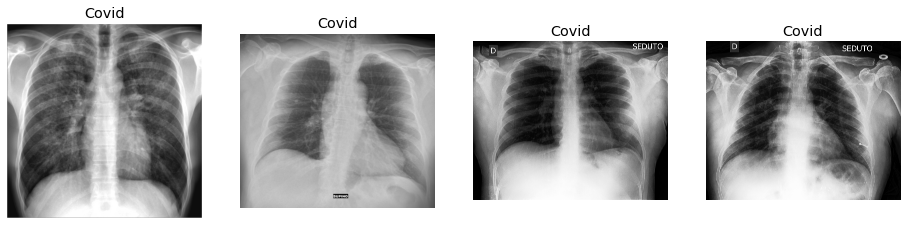

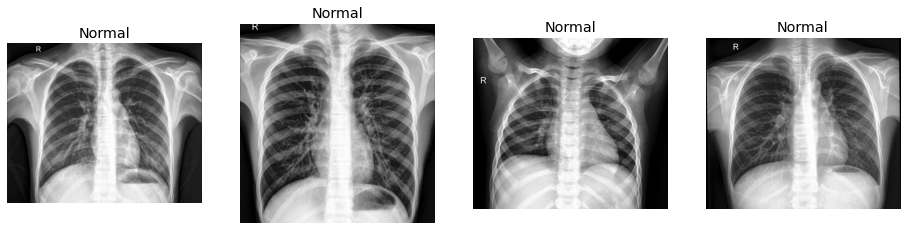

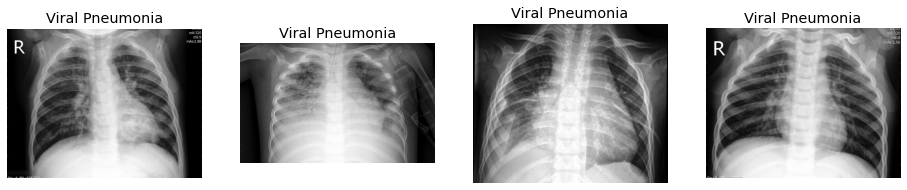

In [34]:
#3.Menampilkan sample sebagian gambar dari kelas yang berbeda dengan ukuran 2 baris x 4 kolom

import matplotlib.pyplot as plt
import matplotlib.image as mping

traincovid_dir = os.path.join('/content/drive/MyDrive/Covid19-dataset/train/Covid')
trainnormal_dir = os.path.join('/content/drive/MyDrive/Covid19-dataset/train/Normal')
trainviralpneumonia_dir = os.path.join('/content/drive/MyDrive/Covid19-dataset/train/Viral Pneumonia')

covid_image = os.listdir(traincovid_dir)
normal_image = os.listdir(trainnormal_dir)
viralpneumonia_image = os.listdir(trainviralpneumonia_dir)

fname1 = [os.path.join(traincovid_dir,fname)
        for fname in covid_image[1:5]]

fname2 = [os.path.join(trainnormal_dir,fname)
        for fname in normal_image[1:5]]

fname3 = [os.path.join(trainviralpneumonia_dir,fname)
        for fname in viralpneumonia_image[1:5]]

ncolu = 4
nrow = 3
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*3)
for i,fname in enumerate(fname1):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Covid')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 3
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*3)
for i,fname in enumerate(fname2):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Normal')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 3
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*3)
for i,fname in enumerate(fname3):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Viral Pneumonia')
    plt.imshow(img)
    
plt.show()


#**Data Preprocessing**#

In [51]:
# 1. Gather data training dan testing dengan ukuran gambar 250x250 (total 5 point)

import os 
import cv2
import numpy as np

# gather data train
train_data = []
train_label = []

train_dir = os.path.join('/content/drive/MyDrive/Covid19-dataset/train')
for r, d, f in os.walk(train_dir):
  for file in f :
    # if ".jpeg" + ".png" + ".jpg" in file :
      imagepath = os.path.join(r, file)
      image = cv2.imread(imagepath)
      image = cv2.resize(image, (250,250))
      train_data.append(image)
      label = imagepath.split(os.path.sep)[-2]
      train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

# gather data testing
val_data = []
val_label = []

test_dir = os.path.join('/content/drive/MyDrive/Covid19-dataset/test')
for r, d, f in os.walk(test_dir):
  for file in f :
    # if ".jpeg" + ".png" + ".jpg" in file :
      imagepath = os.path.join(r, file)
      image = cv2.imread(imagepath)
      image = cv2.resize(image, (250,250))
      val_data.append(image)
      label = imagepath.split(os.path.sep)[-2]
      val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [52]:
#shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (251, 250, 250, 3)
Train Label =  (251,)
Validation Data =  (76, 250, 250, 3)
Validation Label =  (76,)


In [54]:
#2. Normalisasi dataset
print("Data sebelum di-normalisasi : ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0

print("Data sesudah di-normalisasi : ", x_train[0][0][0])

Data sebelum di-normalisasi :  [26 26 26]
Data sesudah di-normalisasi :  [0.10196079 0.10196079 0.10196079]


In [55]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[1:10])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label) #ganti y_val

print("Label setelah di-encoder ", y_train[1:10])

Label sebelum di-encoder  ['Viral Pneumonia' 'Viral Pneumonia' 'Viral Pneumonia' 'Viral Pneumonia'
 'Viral Pneumonia' 'Viral Pneumonia' 'Viral Pneumonia' 'Viral Pneumonia'
 'Viral Pneumonia']
Label setelah di-encoder  [2 2 2 2 2 2 2 2 2]


#**Definisikan Model**#

In [56]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [64]:
# Buat model dengan 1 input layer, 1 hidden layer, dan 1 output layer
img_input = layers.Input(shape=(250, 250, 3)) # layer input
x = layers.Flatten()(img_input) # ubah dari matriks 150x150x3 menjadi vektor
x = layers.Dense(128, activation='relu')(x) # hidden layer 1 dengan 128 neuron
output = layers.Dense(1, activation='softmax')(x) # output layer dengan 1 neuron (binary)

# Definisikan modelnya
model = Model(img_input, output)

In [65]:
# Tampilkan model summary
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 250, 250, 3)]     0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 187500)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               24000128  
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 129       
Total params: 24,000,257
Trainable params: 24,000,257
Non-trainable params: 0
_________________________________________________________________


In [68]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [69]:
H = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
8/8 [==============================] - 2s 183ms/step - loss: 0.0000e+00 - acc: 0.2789 - val_loss: 0.0000e+00 - val_acc: 0.2763
Epoch 2/10
8/8 [==============================] - 1s 157ms/step - loss: 0.0000e+00 - acc: 0.2789 - val_loss: 0.0000e+00 - val_acc: 0.2763
Epoch 3/10
8/8 [==============================] - 1s 155ms/step - loss: 0.0000e+00 - acc: 0.2789 - val_loss: 0.0000e+00 - val_acc: 0.2763
Epoch 4/10
8/8 [==============================] - 1s 158ms/step - loss: 0.0000e+00 - acc: 0.2789 - val_loss: 0.0000e+00 - val_acc: 0.2763
Epoch 5/10
8/8 [==============================] - 1s 157ms/step - loss: 0.0000e+00 - acc: 0.2789 - val_loss: 0.0000e+00 - val_acc: 0.2763
Epoch 6/10
8/8 [==============================] - 1s 154ms/step - loss: 0.0000e+00 - acc: 0.2789 - val_loss: 0.0000e+00 - val_acc: 0.2763
Epoch 7/10
8/8 [==============================] - 1s 151ms/step - loss: 0.0000e+00 - acc: 0.2789 - val_loss: 0.0000e+00 - val_acc: 0.2763
Epoch 8/10
8/8 [==================

#Evaluasi Model

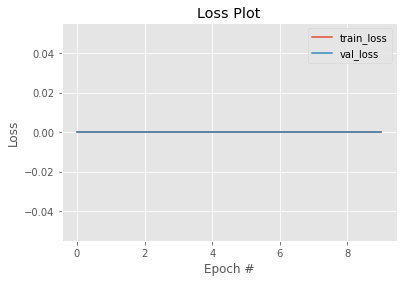

In [70]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 10), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

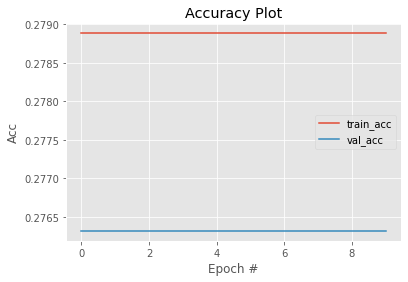

In [72]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 10), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 10), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [47]:
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

